# Prediksi Kenaikan Nilai Siswa SMP Negeri 10 Kota Magelang Pada Asesmen Nasional Berbasis Komputer Menggunakan Metode  Linear Regression, Decision Tree Regressor, Random Forest Regressor,dan Gradient Boosting

 # IDENTITAS
  NAMA : AGUNG NUGROHO
  
  NIM  : A11.2022.14125


# Ringkasan
   Penelitian ini bertujuan untuk menggunakan metode Linear Regression, Decision Tree Regressor,
Random Forest Regressor,dan Gradient Boosting  dalam memprediksi nilai siswa SMP Negeri 10 Kota Magelang
pada program asesmen nasional berbasis komputer.
    Fokus penelitian ini adalah pada upaya memahami hubungan antara nilai ujian sebelumnya siswa dengan
kinerja mereka dalam asesmen nasional yang dilakukan secara komputerisasi. Data yang
digunakan dalam penelitian ini mencakup hasil nilai ujian sebelumnya siswa dan hasil survey lingkungan belajar.


# MASALAH
 Assesmen Nasional Berbasis Komputer (ANBK) merupakan salah satu faktor
untuk peningkatan mutu peserta didik, namun ketidaktahuan menganalisis kemampuan
siswa dalam mengerjakan Assesmen dapat mengakibatkan nilai ANBK yang kurang
diinginkan. Oleh karena itu penelitian prediksi nilai siswa pada ANBK perlu dilakukan
agar siswa dan guru dapat menentukan strategi metode pembelajaran yang cocok sehingga
mendapatkan hasil yang baik dalam pelaksanaan ANBK.

# Tujuan
Melalui analisis ini, diharapkan dapat ditemukan pola dan hubungan yang
signifikan antara variabel input (nilai ujian sebelumnya) dengan variabel output (nilai asesmen
nasional). Temuan dari penelitian ini diharapkan dapat memberikan wawasan yang berharga bagi
stakeholder pendidikan dalam memahami faktor-faktor yang memengaruhi kinerja siswa dalam
asesmen nasional berbasis komputer, serta memberikan dasar untuk pengembangan strategi
pendidikan yang lebih efektif.


# Alur

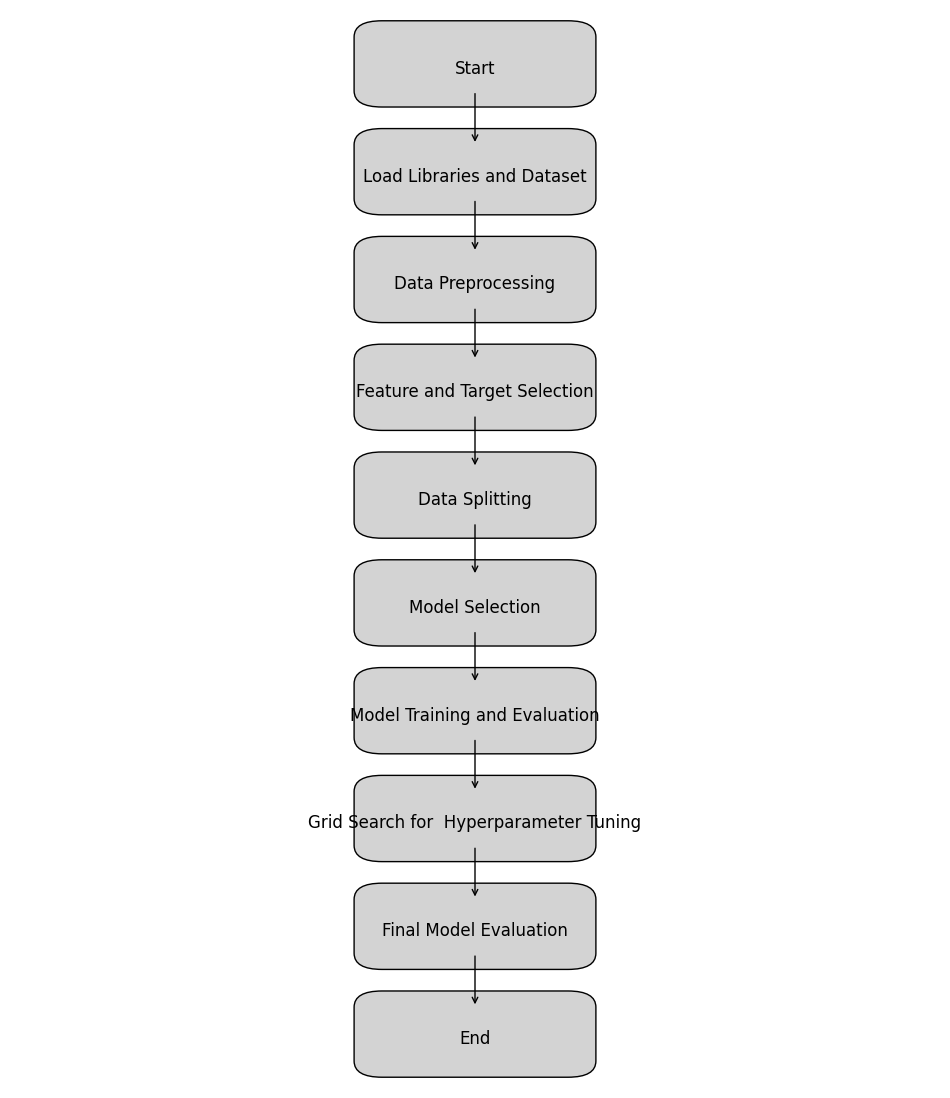

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnnotationBbox, TextArea


fig, ax = plt.subplots(figsize=(12, 14))
ax.set_xlim(0, 10)
ax.set_ylim(-4, 16)
ax.axis('off')


boxes = {
    "start": (5, 15, "Start"),
    "load_data": (5, 13, "Load Libraries and Dataset"),
    "data_preprocessing": (5, 11, "Data Preprocessing"),
    "feature_selection": (5, 9, "Feature and Target Selection"),
    "data_splitting": (5, 7, "Data Splitting"),
    "model_selection": (5, 5, "Model Selection"),
    "model_training": (5, 3, "Model Training and Evaluation"),
    "grid_search": (5, 1, "Grid Search for  Hyperparameter Tuning"),
    "final_evaluation": (5, -1, "Final Model Evaluation"),
    "end": (5, -3, "End")
}

for key, (x, y, text) in boxes.items():
    ax.add_patch(mpatches.FancyBboxPatch((x-1, y-0.5), 2, 1, boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))
    ab = AnnotationBbox(TextArea(text, textprops=dict(ha='center', va='center', fontsize=12)), (x, y), frameon=False)
    ax.add_artist(ab)


arrows = [
    ("start", "load_data"),
    ("load_data", "data_preprocessing"),
    ("data_preprocessing", "feature_selection"),
    ("feature_selection", "data_splitting"),
    ("data_splitting", "model_selection"),
    ("model_selection", "model_training"),
    ("model_training", "grid_search"),
    ("grid_search", "final_evaluation"),
    ("final_evaluation", "end")
]

for (start, end) in arrows:
    x1, y1 = boxes[start][:2]
    x2, y2 = boxes[end][:2]
    ax.annotate("", xy=(x2, y2+0.5), xytext=(x1, y1-0.5), arrowprops=dict(arrowstyle="->"))

plt.show()

# Penjelasan Dataset

Dataset yang digunakan adalah data private yang diperoleh secara langsung melalui
Edubrand yang merupakan Instansi yang bekerjasama dengan SMP Negeri 10 Kota
Magelang untuk melaksanakan simulasi ANBK yang diakses melalui website resmi
Edubrand yaitu https://anbk.edubrand.id/ Dataset yang diperoleh merupakan data nilai
Simulasi ANBK siswa SMP Negeri 10 Kota Magelang pada tanggal 28 Agustus 2023.

# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as pltz
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/rekapitualsinilai-smp10/reakpitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)


# DISPLAY The HEAD of DATASET

In [ ]:
print("Head of the dataset:")
print(df.head())

Head of the dataset:
   No                      Nama  NISN  NILAI_LITERASI_MEMBACA  \
0   1              TABINA BELVA  7257                     397   
1   2      RIONA KAYRA AZ ZAHRA  7222                     355   
2   3  FATIH MAS'UD PUTRA GAMAN  7173                     370   
3   4    FELISHA ROFI ANGGRAENI  7339                     358   
4   5          AMARYA KHOFAISYA  7133                     331   

   CAPAIAN_LITERASI  RANK_LITERASI_MEMBACA LEVEL_LITERASI  NILAI_NUMERASI  \
0            0.8822                      1          MAHIR             379   
1            0.7889                     20          CAKAP             385   
2            0.8222                      7          CAKAP             367   
3            0.7956                     18          CAKAP             378   
4            0.7356                     60          CAKAP             395   

   CAPAIAN_NUMERASI  RANK_NUMERASI LEVEL_NUMERASI  RATA_RATA_NILAI  \
0            0.8422              3          CAKAP      

# Show the number of attributes and their types

In [ ]:

print("\nNumber of attributes and their types:")
print(df.info())


Number of attributes and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      212 non-null    int64  
 1   Nama                                    212 non-null    object 
 2   NISN                                    212 non-null    int64  
 3   NILAI_LITERASI_MEMBACA                  212 non-null    int64  
 4   CAPAIAN_LITERASI                        212 non-null    float64
 5   RANK_LITERASI_MEMBACA                   212 non-null    int64  
 6   LEVEL_LITERASI                          212 non-null    object 
 7   NILAI_NUMERASI                          212 non-null    int64  
 8   CAPAIAN_NUMERASI                        212 non-null    float64
 9   RANK_NUMERASI                           212 non-null    int64  
 10  LEVEL_NUMERASI         

# Distribution of the 'ya' and 'tidak' classes

In [ ]:
class_distribution = df['Apakah Lingkungan Belajar Anda Nyaman?'].value_counts()
print("\nDistribution of 'ya' and 'tidak' classes:")
print(class_distribution)


Distribution of 'ya' and 'tidak' classes:
Apakah Lingkungan Belajar Anda Nyaman?
Ya       188
tidak     24
Name: count, dtype: int64


# Summary statistics of numerical attributes

In [ ]:
print("\nSummary statistics of numerical attributes:")
print(df.describe())


Summary statistics of numerical attributes:
               No         NISN  NILAI_LITERASI_MEMBACA  CAPAIAN_LITERASI  \
count  212.000000   212.000000              212.000000        212.000000   
mean   106.500000  7242.542453              289.599057          0.643555   
std     61.343296    65.237394               58.430131          0.129848   
min      1.000000  7133.000000               98.000000          0.217800   
25%     53.750000  7186.750000              253.500000          0.563300   
50%    106.500000  7240.500000              299.000000          0.664450   
75%    159.250000  7299.250000              335.250000          0.744975   
max    212.000000  7357.000000              397.000000          0.882200   

       RANK_LITERASI_MEMBACA  NILAI_NUMERASI  CAPAIAN_NUMERASI  RANK_NUMERASI  \
count             212.000000      212.000000        212.000000     212.000000   
mean              105.919811      244.707547          0.543794     106.066038   
std                61.44089

# Checking for missing values

In [ ]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
No                                        0
Nama                                      0
NISN                                      0
NILAI_LITERASI_MEMBACA                    0
CAPAIAN_LITERASI                          0
RANK_LITERASI_MEMBACA                     0
LEVEL_LITERASI                            0
NILAI_NUMERASI                            0
CAPAIAN_NUMERASI                          0
RANK_NUMERASI                             0
LEVEL_NUMERASI                            0
RATA_RATA_NILAI                           0
RATA_RATA_CAPAIAN                         0
OVERALL_RANK                              0
Apakah Lingkungan Belajar Anda Nyaman?    0
Nilai Lingkungan belajar anda 0-10        0
dtype: int64


# Visualizing distributions of key attributes

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Visualizing DATA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

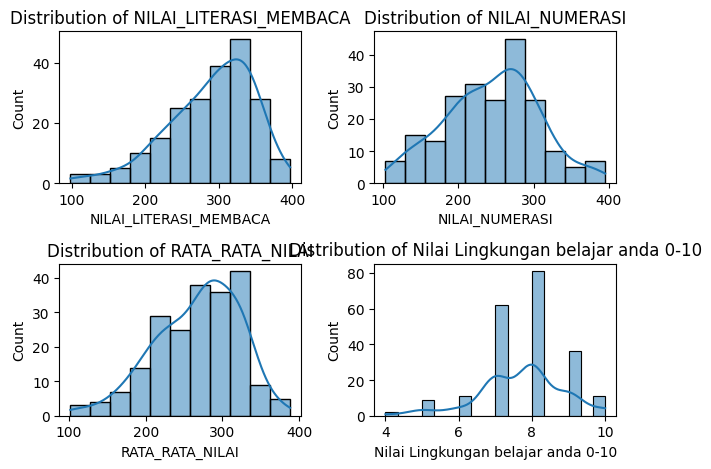

In [ ]:
plt.subplot(2, 2, 1)
sns.histplot(df['NILAI_LITERASI_MEMBACA'], kde=True)
plt.title('Distribution of NILAI_LITERASI_MEMBACA')

plt.subplot(2, 2, 2)
sns.histplot(df['NILAI_NUMERASI'], kde=True)
plt.title('Distribution of NILAI_NUMERASI')

plt.subplot(2, 2, 3)
sns.histplot(df['RATA_RATA_NILAI'], kde=True)
plt.title('Distribution of RATA_RATA_NILAI')

plt.subplot(2, 2, 4)
sns.histplot(df['Nilai Lingkungan belajar anda 0-10'], kde=True)
plt.title('Distribution of Nilai Lingkungan belajar anda 0-10')

plt.tight_layout()
plt.show()

# Visualizing the class distribution of 'Apakah Lingkungan Belajar Anda Nyaman?'

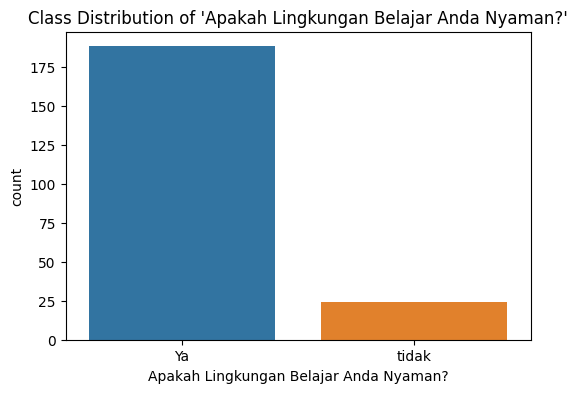

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Apakah Lingkungan Belajar Anda Nyaman?')
plt.title("Class Distribution of 'Apakah Lingkungan Belajar Anda Nyaman?'")
plt.show()

# BALANCING DATA DISTRIBUTION of "Ya" and "tidak"

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
file_path = '/kaggle/input/rekapitualsinilai-smp10/reakpitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)


## Separate the "Ya" and "Tidak" classes

In [ ]:
df_ya = df[df['Apakah Lingkungan Belajar Anda Nyaman?'] == 'Ya']
df_tidak = df[df['Apakah Lingkungan Belajar Anda Nyaman?'] == 'tidak']

## Upsample the "Tidak" class

In [ ]:
df_tidak_upsampled = resample(df_tidak,
                              replace=True,    # sample with replacement
                              n_samples=len(df_ya), # to match number of "Ya" instances
                              random_state=42) # reproducible results

## Combine the upsampled "Tidak" class with the "Ya" class

In [ ]:
df_balanced = pd.concat([df_ya, df_tidak_upsampled])

## Shuffle the combined dataframe

In [ ]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

## Display the new distribution

In [ ]:
balanced_value_counts = df_balanced['Apakah Lingkungan Belajar Anda Nyaman?'].value_counts()
balanced_value_counts

Apakah Lingkungan Belajar Anda Nyaman?
tidak    188
Ya       188
Name: count, dtype: int64

## Saving New Data

In [ ]:
output_file_path = '/kaggle/working/balanced_rekapitulasi_nilai_smp_10_magelang.xlsx'
df_balanced.to_excel(output_file_path, index=False)

# Verify Balanced Data

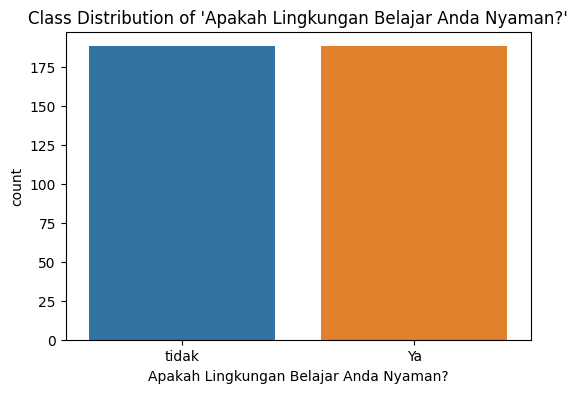

In [ ]:
file_path = '/kaggle/working/balanced_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Apakah Lingkungan Belajar Anda Nyaman?')
plt.title("Class Distribution of 'Apakah Lingkungan Belajar Anda Nyaman?'")
plt.show()

# CONVERT "Ya" to 1 and "tidak" to 0

In [ ]:
# Load the balanced dataset
file_path_balanced = '/kaggle/working/balanced_rekapitulasi_nilai_smp_10_magelang.xlsx'
df_balanced = pd.read_excel(file_path_balanced)

# Convert the "Ya" and "Tidak" values to 1 and 0 respectively
df_balanced['Apakah Lingkungan Belajar Anda Nyaman?'] = df_balanced['Apakah Lingkungan Belajar Anda Nyaman?'].map({'Ya': 1, 'tidak': 0})

# Save the modified balanced dataset to a new Excel file
output_file_path_binary = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df_balanced.to_excel(output_file_path_binary, index=False)

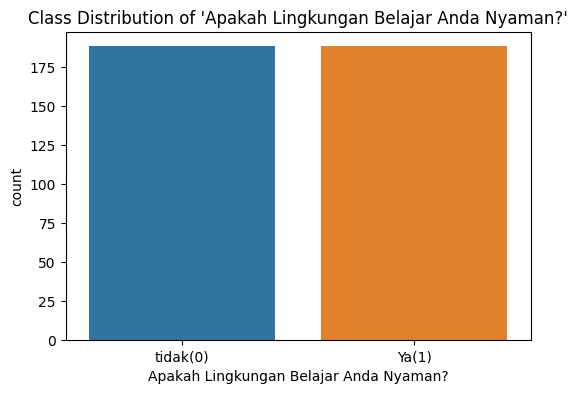

In [ ]:
file_path = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Apakah Lingkungan Belajar Anda Nyaman?')
plt.title("Class Distribution of 'Apakah Lingkungan Belajar Anda Nyaman?'")
plt.xticks([0, 1], ['tidak(0)', 'Ya(1)'])
plt.show()

# BUILDING MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)

## Prepare the features and target variables

In [ ]:
X = df[['Apakah Lingkungan Belajar Anda Nyaman?', 'Nilai Lingkungan belajar anda 0-10']]
y_literasi = df['NILAI_LITERASI_MEMBACA']
y_numerasi = df['NILAI_NUMERASI']

## Split the data into training and testing sets
## 80% for training and 20% for testing

In [ ]:
X_train, X_test, y_train_literasi, y_test_literasi = train_test_split(X, y_literasi, test_size=0.2, random_state=42)
_, _, y_train_numerasi, y_test_numerasi = train_test_split(X, y_numerasi, test_size=0.2, random_state=42)

## Initialize the models
## Model Yang Digunakan
1. Linear Regression
2. Decsion Tree Regressor
3. Random Forest Regressor
4. Gradient Boosting Regressor

In [ ]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

## Train and evaluate the models for NILAI_LITERASI_MEMBACA

In [ ]:
# Function to calculate percentage accuracy from R2 Score
def r2_to_accuracy(r2):
    return max(0, min(100, r2 * 100))

results_literasi = {}
for name, model in models.items():
    model.fit(X_train, y_train_literasi)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test_literasi, y_pred)
    r2 = r2_score(y_test_literasi, y_pred)
    accuracy = r2_to_accuracy(r2)
    results_literasi[name] = {'MSE': mse, 'R2 Score': r2, 'Accuracy (%)': accuracy}

## Train and evaluate the models for NILAI_NUMERASI

In [ ]:
results_numerasi = {}
for name, model in models.items():
    model.fit(X_train, y_train_numerasi)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test_numerasi, y_pred)
    r2 = r2_score(y_test_numerasi, y_pred)
    accuracy = r2_to_accuracy(r2)
    results_numerasi[name] = {'MSE': mse, 'R2 Score': r2, 'Accuracy (%)': accuracy}

## Prepare the results as DataFrames

In [ ]:
results_literasi_df = pd.DataFrame(results_literasi).T
results_numerasi_df = pd.DataFrame(results_numerasi).T

## Plot the results

In [ ]:
def plot_predictions(model_name, y_test, y_pred, target_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} - Actual vs Predicted for {target_name}')
    plt.show()

## Display the results

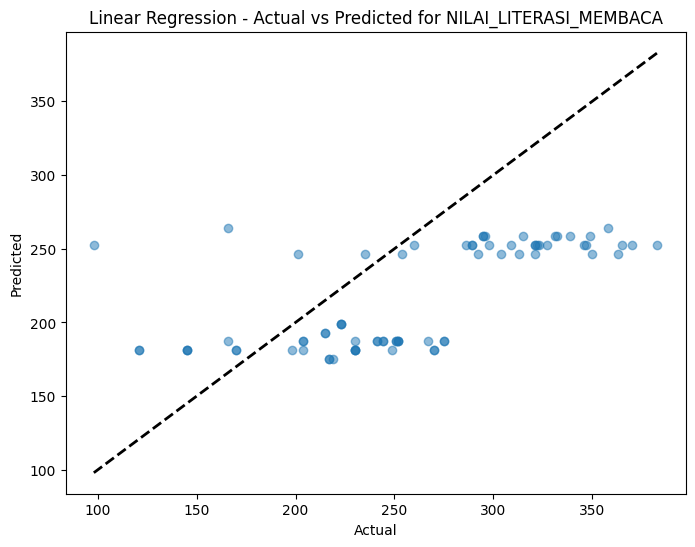

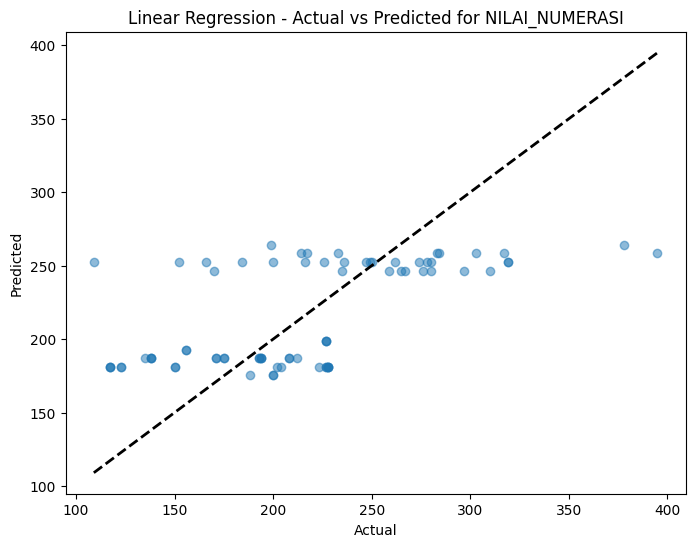

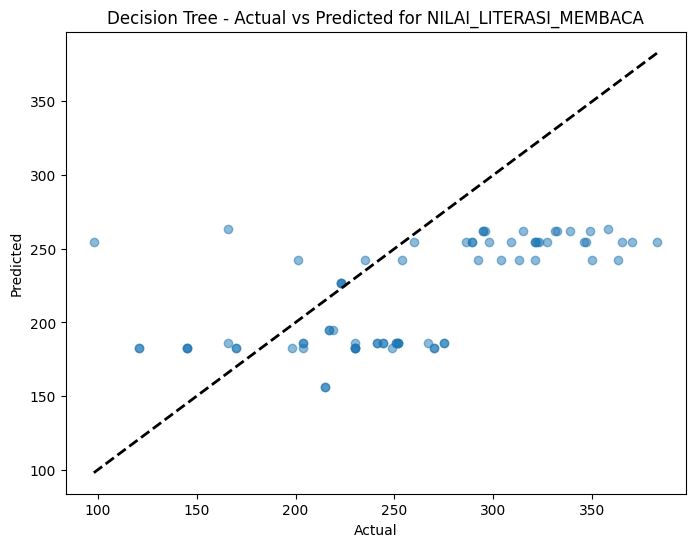

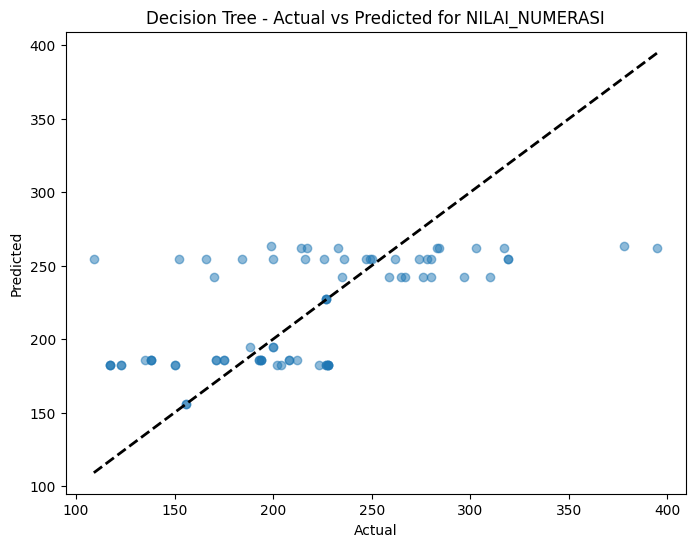

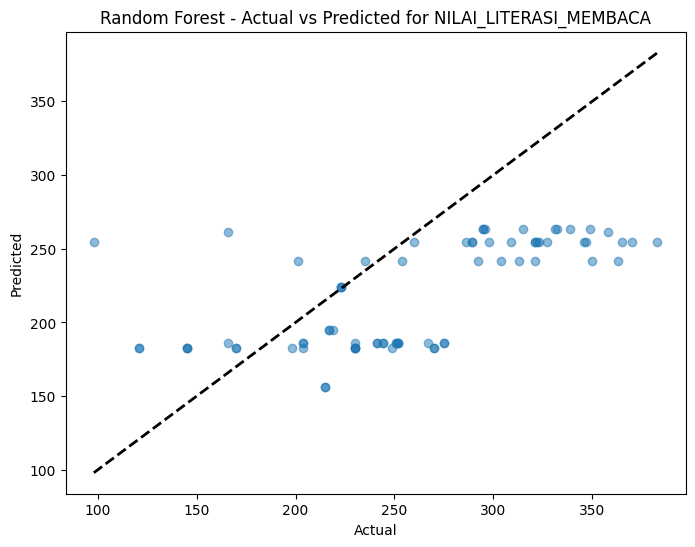

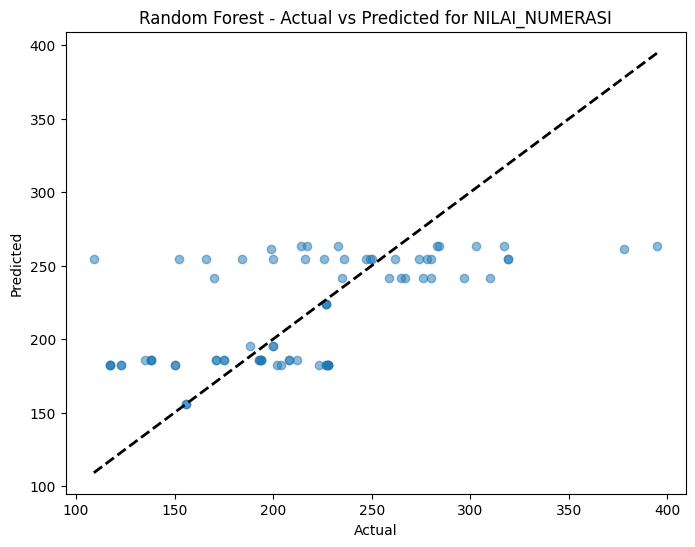

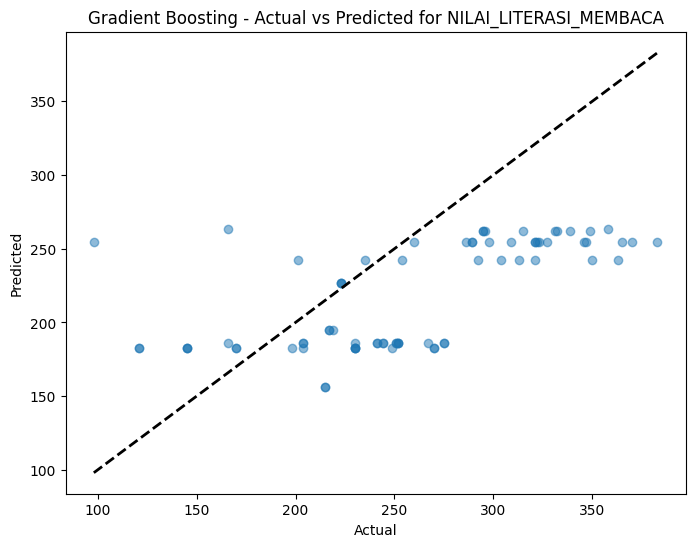

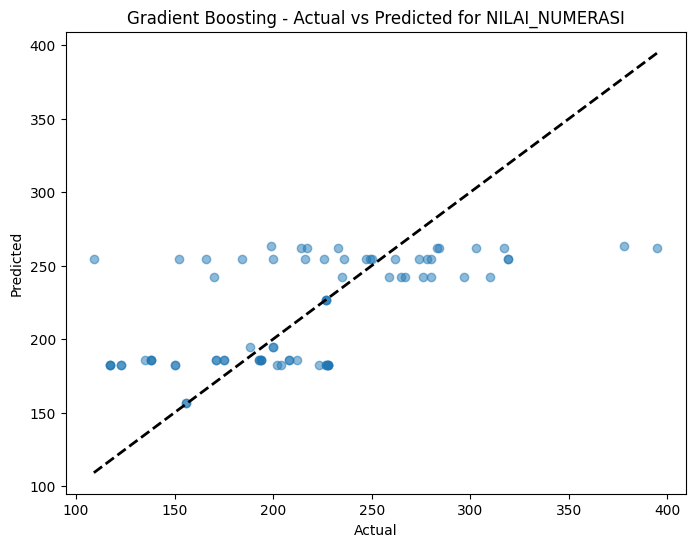

In [ ]:

for name, model in models.items():
    y_pred_literasi = model.predict(X_test)
    plot_predictions(name, y_test_literasi, y_pred_literasi, 'NILAI_LITERASI_MEMBACA')

    # Predict and plot for NILAI_NUMERASI
    y_pred_numerasi = model.predict(X_test)
    plot_predictions(name, y_test_numerasi, y_pred_numerasi, 'NILAI_NUMERASI')

In [ ]:
print("Results for NILAI_LITERASI_MEMBACA:")
results_literasi_df = pd.DataFrame(results_literasi).T
print(results_literasi_df)

print("\nResults for NILAI_NUMERASI:")
results_numerasi_df = pd.DataFrame(results_numerasi).T
print(results_numerasi_df)


Results for NILAI_LITERASI_MEMBACA:
                           MSE  R2 Score  Accuracy (%)
Linear Regression  2416.000573  0.433873     43.387293
Decision Tree      2207.606974  0.482705     48.270457
Random Forest      2207.221608  0.482795     48.279487
Gradient Boosting  2207.631308  0.482699     48.269887

Results for NILAI_NUMERASI:
                           MSE  R2 Score  Accuracy (%)
Linear Regression  2326.347390  0.359817     35.981674
Decision Tree      2257.856684  0.378665     37.866457
Random Forest      2263.426810  0.377132     37.713174
Gradient Boosting  2257.951112  0.378639     37.863858


# Fine Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)

# Prepare the features and target variables
X = df[['Apakah Lingkungan Belajar Anda Nyaman?', 'Nilai Lingkungan belajar anda 0-10']]
y_literasi = df['NILAI_LITERASI_MEMBACA']
y_numerasi = df['NILAI_NUMERASI']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train_literasi, y_test_literasi = train_test_split(X_scaled, y_literasi, test_size=0.2, random_state=42)
_, _, y_train_numerasi, y_test_numerasi = train_test_split(X_scaled, y_numerasi, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to calculate percentage accuracy from R2 Score
def r2_to_accuracy(r2):
    return max(0, min(100, r2 * 100))

# Hyperparameter tuning with GridSearchCV for RandomForest and GradientBoosting
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

best_params = {}

# Train and evaluate the models for NILAI_LITERASI_MEMBACA
results_literasi = {}
for name, model in models.items():
    if name in ['Random Forest', 'Gradient Boosting']:
        if name == 'Random Forest':
            grid_search = GridSearchCV(model, param_grid_rf, cv=5, scoring='r2')
        else:
            grid_search = GridSearchCV(model, param_grid_gb, cv=5, scoring='r2')
        grid_search.fit(X_train, y_train_literasi)
        best_params[name] = grid_search.best_params_
        model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train_literasi)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test_literasi, y_pred)
    r2 = r2_score(y_test_literasi, y_pred)
    accuracy = r2_to_accuracy(r2)
    results_literasi[name] = {'MSE': mse, 'R2 Score': r2, 'Accuracy (%)': accuracy}

# Train and evaluate the models for NILAI_NUMERASI
results_numerasi = {}
for name, model in models.items():
    if name in ['Random Forest', 'Gradient Boosting']:
        if name == 'Random Forest':
            grid_search = GridSearchCV(model, param_grid_rf, cv=5, scoring='r2')
        else:
            grid_search = GridSearchCV(model, param_grid_gb, cv=5, scoring='r2')
        grid_search.fit(X_train, y_train_numerasi)
        best_params[name] = grid_search.best_params_
        model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train_numerasi)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test_numerasi, y_pred)
    r2 = r2_score(y_test_numerasi, y_pred)
    accuracy = r2_to_accuracy(r2)
    results_numerasi[name] = {'MSE': mse, 'R2 Score': r2, 'Accuracy (%)': accuracy}

# Display the results
print("Results for NILAI_LITERASI_MEMBACA:")
results_literasi_df = pd.DataFrame(results_literasi).T
print(results_literasi_df)

print("\nResults for NILAI_NUMERASI:")
results_numerasi_df = pd.DataFrame(results_numerasi).T
print(results_numerasi_df)




Results for NILAI_LITERASI_MEMBACA:
                           MSE  R2 Score  Accuracy (%)
Linear Regression  2416.000573  0.433873     43.387293
Decision Tree      2207.606974  0.482705     48.270457
Random Forest      2201.720462  0.484084     48.408392
Gradient Boosting  2287.589756  0.463963     46.396268

Results for NILAI_NUMERASI:
                           MSE  R2 Score  Accuracy (%)
Linear Regression  2326.347390  0.359817     35.981674
Decision Tree      2257.856684  0.378665     37.866457
Random Forest      2278.613076  0.372953     37.295266
Gradient Boosting  2302.259394  0.366445     36.644547


# Fine Tuning Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)

# Prepare the features and target variables
X = df[['Apakah Lingkungan Belajar Anda Nyaman?', 'Nilai Lingkungan belajar anda 0-10']]
y_literasi = df['NILAI_LITERASI_MEMBACA']

# Split the data into training and testing sets
X_train, X_test, y_train_literasi, y_test_literasi = train_test_split(X, y_literasi, test_size=0.2, random_state=42)

# Different polynomial degrees to try
degrees = [1, 2, 3]

# Regularized linear models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

results = {}

for degree in degrees:
    for model_name, model in models.items():
        pipeline = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])

        # Train the model
        pipeline.fit(X_train, y_train_literasi)

        # Predict on the test set
        y_pred_literasi = pipeline.predict(X_test)

        # Evaluate the model
        mse_literasi = mean_squared_error(y_test_literasi, y_pred_literasi)
        r2_literasi = r2_score(y_test_literasi, y_pred_literasi)
        accuracy = max(0, min(100, r2_literasi * 100))

        # Cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train_literasi, cv=5, scoring='r2')

        results[(model_name, degree)] = {
            'Mean Squared Error': mse_literasi,
            'R2 Score': r2_literasi,
            'Accuracy (%)': accuracy,
            'Cross-Validation R2 Scores': cv_scores,
            'Mean Cross-Validation R2 Score': cv_scores.mean()
        }

# Display the results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Accuracy (%)', ascending=False)
print(results_df)


                    Mean Squared Error  R2 Score Accuracy (%)  \
Linear Regression 3        2247.046085  0.473463    47.346304   
                  2         2328.44119   0.45439     45.43902   
Ridge Regression  3        2337.897069  0.452174    45.217446   
                  2        2364.700629  0.445894    44.589375   
Linear Regression 1        2416.000573  0.433873    43.387293   
Ridge Regression  1        2416.330576  0.433796    43.379561   
Lasso Regression  1        2431.670886  0.430201      43.0201   
                  2        2431.670886  0.430201      43.0201   
                  3        2431.670898  0.430201      43.0201   

                                            Cross-Validation R2 Scores  \
Linear Regression 3  [0.5360088208187905, 0.1305881302591383, 0.380...   
                  2  [0.5328125164452953, 0.3504913177845901, 0.377...   
Ridge Regression  3  [0.5396243145589016, 0.361147131130236, 0.3725...   
                  2  [0.5439174917712005, 0.405705556

# Fine Tuning Decision Tree Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)

# Prepare the features and target variables
X = df[['Apakah Lingkungan Belajar Anda Nyaman?', 'Nilai Lingkungan belajar anda 0-10']]
y_literasi = df['NILAI_LITERASI_MEMBACA']

# Split the data into training and testing sets
X_train, X_test, y_train_literasi, y_test_literasi = train_test_split(X, y_literasi, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures, StandardScaler, and DecisionTreeRegressor
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__max_depth': [3, 5, 7, 10, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train_literasi)

# Get the best estimator
best_pipeline = grid_search.best_estimator_

# Predict on the test set
y_pred_literasi = best_pipeline.predict(X_test)

# Evaluate the model
mse_literasi = mean_squared_error(y_test_literasi, y_pred_literasi)
r2_literasi = r2_score(y_test_literasi, y_pred_literasi)
accuracy = max(0, min(100, r2_literasi * 100))

# Cross-validation scores
cv_scores = cross_val_score(best_pipeline, X_train, y_train_literasi, cv=5, scoring='r2')

# Print the evaluation metrics
print("Optimized Decision Tree Regressor for NILAI_LITERASI_MEMBACA")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse_literasi}")
print(f"R2 Score: {r2_literasi}")
print(f"Accuracy (%): {accuracy}")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {cv_scores.mean()}")


Optimized Decision Tree Regressor for NILAI_LITERASI_MEMBACA
Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Mean Squared Error: 2207.606974018282
R2 Score: 0.48270456855935817
Accuracy (%): 48.27045685593582
Cross-Validation R2 Scores: [0.55210364 0.16906859 0.41021792 0.38181564 0.19447515]
Mean Cross-Validation R2 Score: 0.34153618668257996


# Fine Tuning Random Forest Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)

# Prepare the features and target variables
X = df[['Apakah Lingkungan Belajar Anda Nyaman?', 'Nilai Lingkungan belajar anda 0-10']]
y_literasi = df['NILAI_LITERASI_MEMBACA']

# Split the data into training and testing sets
X_train, X_test, y_train_literasi, y_test_literasi = train_test_split(X, y_literasi, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures, StandardScaler, and RandomForestRegressor
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train_literasi)

# Get the best estimator
best_pipeline = grid_search.best_estimator_

# Predict on the test set
y_pred_literasi = best_pipeline.predict(X_test)

# Evaluate the model
mse_literasi = mean_squared_error(y_test_literasi, y_pred_literasi)
r2_literasi = r2_score(y_test_literasi, y_pred_literasi)
accuracy = max(0, min(100, r2_literasi * 100))

# Cross-validation scores
cv_scores = cross_val_score(best_pipeline, X_train, y_train_literasi, cv=5, scoring='r2')

# Print the evaluation metrics
print("Optimized Random Forest Regressor for NILAI_LITERASI_MEMBACA")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse_literasi}")
print(f"R2 Score: {r2_literasi}")
print(f"Accuracy (%): {accuracy}")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {cv_scores.mean()}")


Optimized Random Forest Regressor for NILAI_LITERASI_MEMBACA
Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Mean Squared Error: 2206.5707981524542
R2 Score: 0.4829473694962415
Accuracy (%): 48.29473694962415
Cross-Validation R2 Scores: [0.55509991 0.28864721 0.41160409 0.39082899 0.21356694]
Mean Cross-Validation R2 Score: 0.3719494300665168


# Fine Tuning GRADIENT BOOSTING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)

# Prepare the features and target variables
X = df[['Apakah Lingkungan Belajar Anda Nyaman?', 'Nilai Lingkungan belajar anda 0-10']]
y_literasi = df['NILAI_LITERASI_MEMBACA']

# Split the data into training and testing sets
X_train, X_test, y_train_literasi, y_test_literasi = train_test_split(X, y_literasi, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures, StandardScaler, and GradientBoostingRegressor
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train_literasi)

# Get the best estimator
best_pipeline = grid_search.best_estimator_

# Predict on the test set
y_pred_literasi = best_pipeline.predict(X_test)

# Evaluate the model
mse_literasi = mean_squared_error(y_test_literasi, y_pred_literasi)
r2_literasi = r2_score(y_test_literasi, y_pred_literasi)
accuracy = max(0, min(100, r2_literasi * 100))

# Cross-validation scores
cv_scores = cross_val_score(best_pipeline, X_train, y_train_literasi, cv=5, scoring='r2')

# Print the evaluation metrics
print("Optimized Gradient Boosting Regressor for NILAI_LITERASI_MEMBACA")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse_literasi}")
print(f"R2 Score: {r2_literasi}")
print(f"Accuracy (%): {accuracy}")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {cv_scores.mean()}")


Optimized Gradient Boosting Regressor for NILAI_LITERASI_MEMBACA
Best Parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Mean Squared Error: 2287.5897559649675
R2 Score: 0.4639626782764048
Accuracy (%): 46.39626782764048
Cross-Validation R2 Scores: [0.53067529 0.2209215  0.39999397 0.36829872 0.208083  ]
Mean Cross-Validation R2 Score: 0.34559449683714316


# Fine Tuning XBOOST REGRESSOR

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/kaggle/working/balanced_binary_rekapitulasi_nilai_smp_10_magelang.xlsx'
df = pd.read_excel(file_path)

# Prepare the features and target variables
X = df[['Apakah Lingkungan Belajar Anda Nyaman?', 'Nilai Lingkungan belajar anda 0-10']]
y_literasi = df['NILAI_LITERASI_MEMBACA']

# Split the data into training and testing sets
X_train, X_test, y_train_literasi, y_test_literasi = train_test_split(X, y_literasi, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures, StandardScaler, and XGBRegressor
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_child_weight': [1, 3, 5],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train_literasi)

# Get the best estimator
best_pipeline = grid_search.best_estimator_

# Predict on the test set
y_pred_literasi = best_pipeline.predict(X_test)

# Evaluate the model
mse_literasi = mean_squared_error(y_test_literasi, y_pred_literasi)
r2_literasi = r2_score(y_test_literasi, y_pred_literasi)
accuracy = max(0, min(100, r2_literasi * 100))

# Cross-validation scores
cv_scores = cross_val_score(best_pipeline, X_train, y_train_literasi, cv=5, scoring='r2')

# Print the evaluation metrics
print("Optimized XGBoost Regressor for NILAI_LITERASI_MEMBACA")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse_literasi}")
print(f"R2 Score: {r2_literasi}")
print(f"Accuracy (%): {accuracy}")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {cv_scores.mean()}")


Optimized XGBoost Regressor for NILAI_LITERASI_MEMBACA
Best Parameters: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__min_child_weight': 5, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
Mean Squared Error: 2292.622414238181
R2 Score: 0.46278340535175155
Accuracy (%): 46.278340535175154
Cross-Validation R2 Scores: [0.53406795 0.27676686 0.39717816 0.37225898 0.21375727]
Mean Cross-Validation R2 Score: 0.35880584227843204


# Diskusi Hasil

Dalam penelitian ini, beberapa metode prediksi telah diaplikasikan untuk memproyeksikan kenaikan nilai siswa SMP Negeri 10 Kota Magelang pada Asesmen Nasional Berbasis Komputer (ANBK). Metode yang digunakan meliputi Linear Regression, Decision Tree Regressor, Random Forest Regressor, dan Gradient Boosting.

Hasil prediksi dari berbagai metode ini menunjukkan bahwa ada korelasi antara nilai ujian sebelumnya dengan hasil ANBK. Namun, akurasi prediksi bervariasi di antara metode yang digunakan. 

Hasil Prediksi 
1.  Linear Regression (47.3%)
2.  Decision Tree Regressor (48.27%)
3.  Random Forest Regressor (48.29%)
4.  Gradient Boosting (46.39%)


# Kesimpulan
Meskipun penelitian ini berhasil memprediksi kenaikan nilai siswa, terdapat beberapa faktor tambahan yang perlu dipertimbangkan untuk meningkatkan akurasi prediksi. Faktor-faktor tersebut meliputi:

1. Metode Pengajaran Guru: Cara guru mengajar memiliki pengaruh signifikan terhadap pemahaman dan prestasi siswa. Pengajaran yang interaktif dan inovatif dapat membantu siswa lebih memahami materi.

2. Materi Pembelajaran: Kualitas dan relevansi materi yang diajarkan juga memainkan peran penting. Materi yang disesuaikan dengan kebutuhan dan kemampuan siswa dapat meningkatkan hasil belajar.

3. Lingkungan Belajar: Lingkungan belajar yang kondusif, baik di sekolah maupun di rumah, dapat mendukung siswa dalam mencapai hasil yang lebih baik.

Dengan memasukkan variabel-variabel tambahan ini, prediksi kenaikan nilai dapat menjadi lebih akurat dan komprehensif. Penelitian lanjutan yang mengintegrasikan variabel-variabel tersebut diharapkan dapat memberikan wawasan yang lebih dalam mengenai faktor-faktor yang mempengaruhi prestasi siswa dalam ANBK.